In [43]:
import warnings
warnings.filterwarnings('ignore')

#Manipulaçao de dataframe
import pandas as pd
#Biblioteca de construção de graficos
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
# Configurando a formatação local para usar a vírgula como separador de milhar
import locale
locale.setlocale(locale.LC_ALL, '')
import numpy as np



In [44]:
# Configurando a formatação local para usar a vírgula como separador de milhar
locale.setlocale(locale.LC_ALL, '')

'Portuguese_Brazil.1252'

In [45]:
#Carregando o dataset

df_dados = pd.read_csv('./pacotes_agregados_valores_16_310124_proc.csv',delimiter=',')

#Exibindo o dataframe

df_dados.head(5)

,NUMERO_PEDIDO_JMS,FRANQUEADO,BASE_ENTREGA,AGREGADO,ASSINATURA,VALOR_MERCADORIA,CEP,ENDERECO_COMPLETO,CIDADE,BAIRRO,DESTINATARIO,HORARIO_ENTREGA,CPF_CNPJ,PESO_COBRAVEL,TIPO_VEICULO,BASE,VALOR
0,888000353786415,NP RIO 02,CD RIO 003,MEI CARRO - PRISCILA DOS SANTOS PIRES,RECEBIMENTO COM ASSINATURA NORMAL,199.07,20550045,RUA CARMELA DUTRARUA CARMELA DUTRA 69,RIO DE JANEIRO,TIJUCA,ANDREIA SANTOS,2024-01-26,13083938730,3.81,CARRO,CD RIO 003,"2,8"
1,888000386884424,NP DQC 01,CD NVF 001,MEI CARRO - DAVI EDUARDO ALMEIDA DE MENEZES COSTA,RECEBIMENTO COM ASSINATURA NORMAL,111.95,28695000,RUA HENRIQUE LAJERUA HENRIQUE LAJE 517,CACHOEIRAS DE MACACU,BAIRRO INEXISTENTE,KETLEN ENGUEL,2024-01-26,11780918720,3.15,CARRO,CD NVF 001,"2,8"
2,888000389101820,NP DQC 01,CD NVF 001,ETC SSS TRANSPORTE CARRO - ROSINEY THOMAZ DA C JR,RECEBIMENTO COM ASSINATURA NORMAL,99.90,28680000,RUA: MARIA VERALBA FERRAZ LOTE 4 QUADRA 9 / S...,CACHOEIRAS DE MACACU,BAIRRO INEXISTENTE,VÂNIA CARDOSO ALBINO,2024-01-26,15869115701,4.22,CARRO,CD NVF 001,"2,8"
3,888000389211345,NP RIO 02,CD RIO 006,MEI CARRO - CARLOS JOSE DIAS CANANEA,RECEBIMENTO COM ASSINATURA NORMAL,37.60,23045040,RUA BAICURURUA BAICURU 231,RIO DE JANEIRO,CAMPO GRANDE,SUELLEN VALVERDE,2024-01-26,7448206770,1.41,CARRO,CD RIO 004,"2,8"
4,888000392194275,NP RIO 02,CD RIO 006,MEI CARRO - DOUGLAS PEREIRA DA SILVA,RECEBIMENTO COM ASSINATURA NORMAL,13.95,23560130,ESTRADA DO CORTUME AC BARÃO DE PETRÓPOLIS NEST...,RIO DE JANEIRO,SANTA CRUZ,VANESSA ELIAS,2024-01-26,14094457712,1.71,CARRO,CD RIO 006,"2,8"


In [46]:
#Verificando se existem missings
df_dados.isnull().sum()

NUMERO_PEDIDO_JMS       0
FRANQUEADO              0
BASE_ENTREGA            0
AGREGADO                0
ASSINATURA              0
VALOR_MERCADORIA        0
CEP                     0
ENDERECO_COMPLETO       0
CIDADE                  0
BAIRRO                  0
DESTINATARIO            0
HORARIO_ENTREGA         0
CPF_CNPJ                0
PESO_COBRAVEL           0
TIPO_VEICULO         1361
BASE                 1368
VALOR                1368
dtype: int64

In [47]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442024 entries, 0 to 442023
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NUMERO_PEDIDO_JMS  442024 non-null  int64  
 1   FRANQUEADO         442024 non-null  object 
 2   BASE_ENTREGA       442024 non-null  object 
 3   AGREGADO           442024 non-null  object 
 4   ASSINATURA         442024 non-null  object 
 5   VALOR_MERCADORIA   442024 non-null  float64
 6   CEP                442024 non-null  int64  
 7   ENDERECO_COMPLETO  442024 non-null  object 
 8   CIDADE             442024 non-null  object 
 9   BAIRRO             442024 non-null  object 
 10  DESTINATARIO       442024 non-null  object 
 11  HORARIO_ENTREGA    442024 non-null  object 
 12  CPF_CNPJ           442024 non-null  int64  
 13  PESO_COBRAVEL      442024 non-null  float64
 14  TIPO_VEICULO       440663 non-null  object 
 15  BASE               440656 non-null  object 
 16  VA

In [48]:
#Modificando a Virgula por ponto. Assim consigo passar para float
df_dados['VALOR'] = df_dados['VALOR'].str.replace(',','.')

#Transformando o type do atributo VALOR para float
df_dados['VALOR'] = df_dados['VALOR'].astype(float)

#Exibindo 
df_dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442024 entries, 0 to 442023
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NUMERO_PEDIDO_JMS  442024 non-null  int64  
 1   FRANQUEADO         442024 non-null  object 
 2   BASE_ENTREGA       442024 non-null  object 
 3   AGREGADO           442024 non-null  object 
 4   ASSINATURA         442024 non-null  object 
 5   VALOR_MERCADORIA   442024 non-null  float64
 6   CEP                442024 non-null  int64  
 7   ENDERECO_COMPLETO  442024 non-null  object 
 8   CIDADE             442024 non-null  object 
 9   BAIRRO             442024 non-null  object 
 10  DESTINATARIO       442024 non-null  object 
 11  HORARIO_ENTREGA    442024 non-null  object 
 12  CPF_CNPJ           442024 non-null  int64  
 13  PESO_COBRAVEL      442024 non-null  float64
 14  TIPO_VEICULO       440663 non-null  object 
 15  BASE               440656 non-null  object 
 16  VA

ANALISE EXPLORATORIA

In [49]:
#Verificando a dimensão do dataframe
df_dados.shape

(442024, 17)

O datraframe possuui 442024 linhas, 
que são os pacotes entregue na segunda quinzena de janeiro.
e possuí 17 atribudos


In [50]:
#Contando os pacotes entregue por base

df_base_entregue = df_dados['BASE_ENTREGA'].value_counts(ascending=True)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

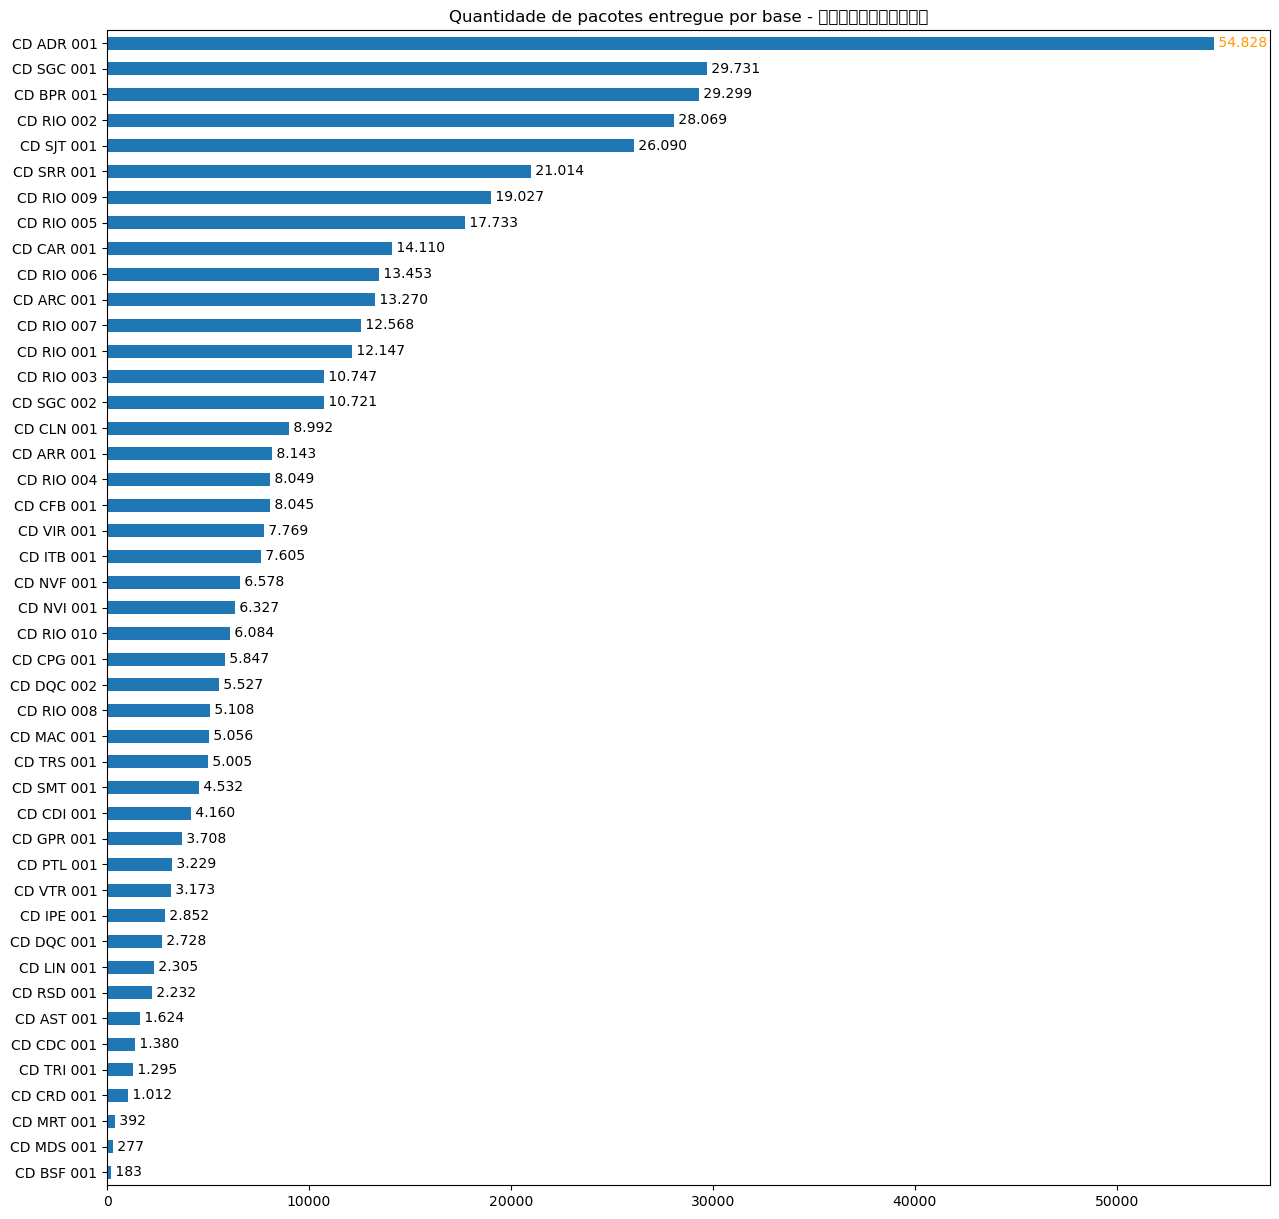

In [196]:
#Gerando graficos 

fig, ax = plt.subplots(figsize=(15,15))

#plota o gráfico de barras
df_base_entregue.plot(kind='barh', legend=False)

plt.title('Quantidade de pacotes entregue por base - 每个基地交付的包裹数量')
plt.xlabel('')
plt.ylabel("")

#Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0], fmt=lambda x: f'{locale.format_string(" %.f", x, grouping=True)}')
b1[-1].set_color("#ff9900")

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout

In [52]:
#Soma dos valores pagor por base
df_valor_base = df_dados.groupby('BASE_ENTREGA')['VALOR'].sum()

#Colocando os valores em ordem descrescente
df_valor_base.sort_values(ascending=True, inplace=True)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

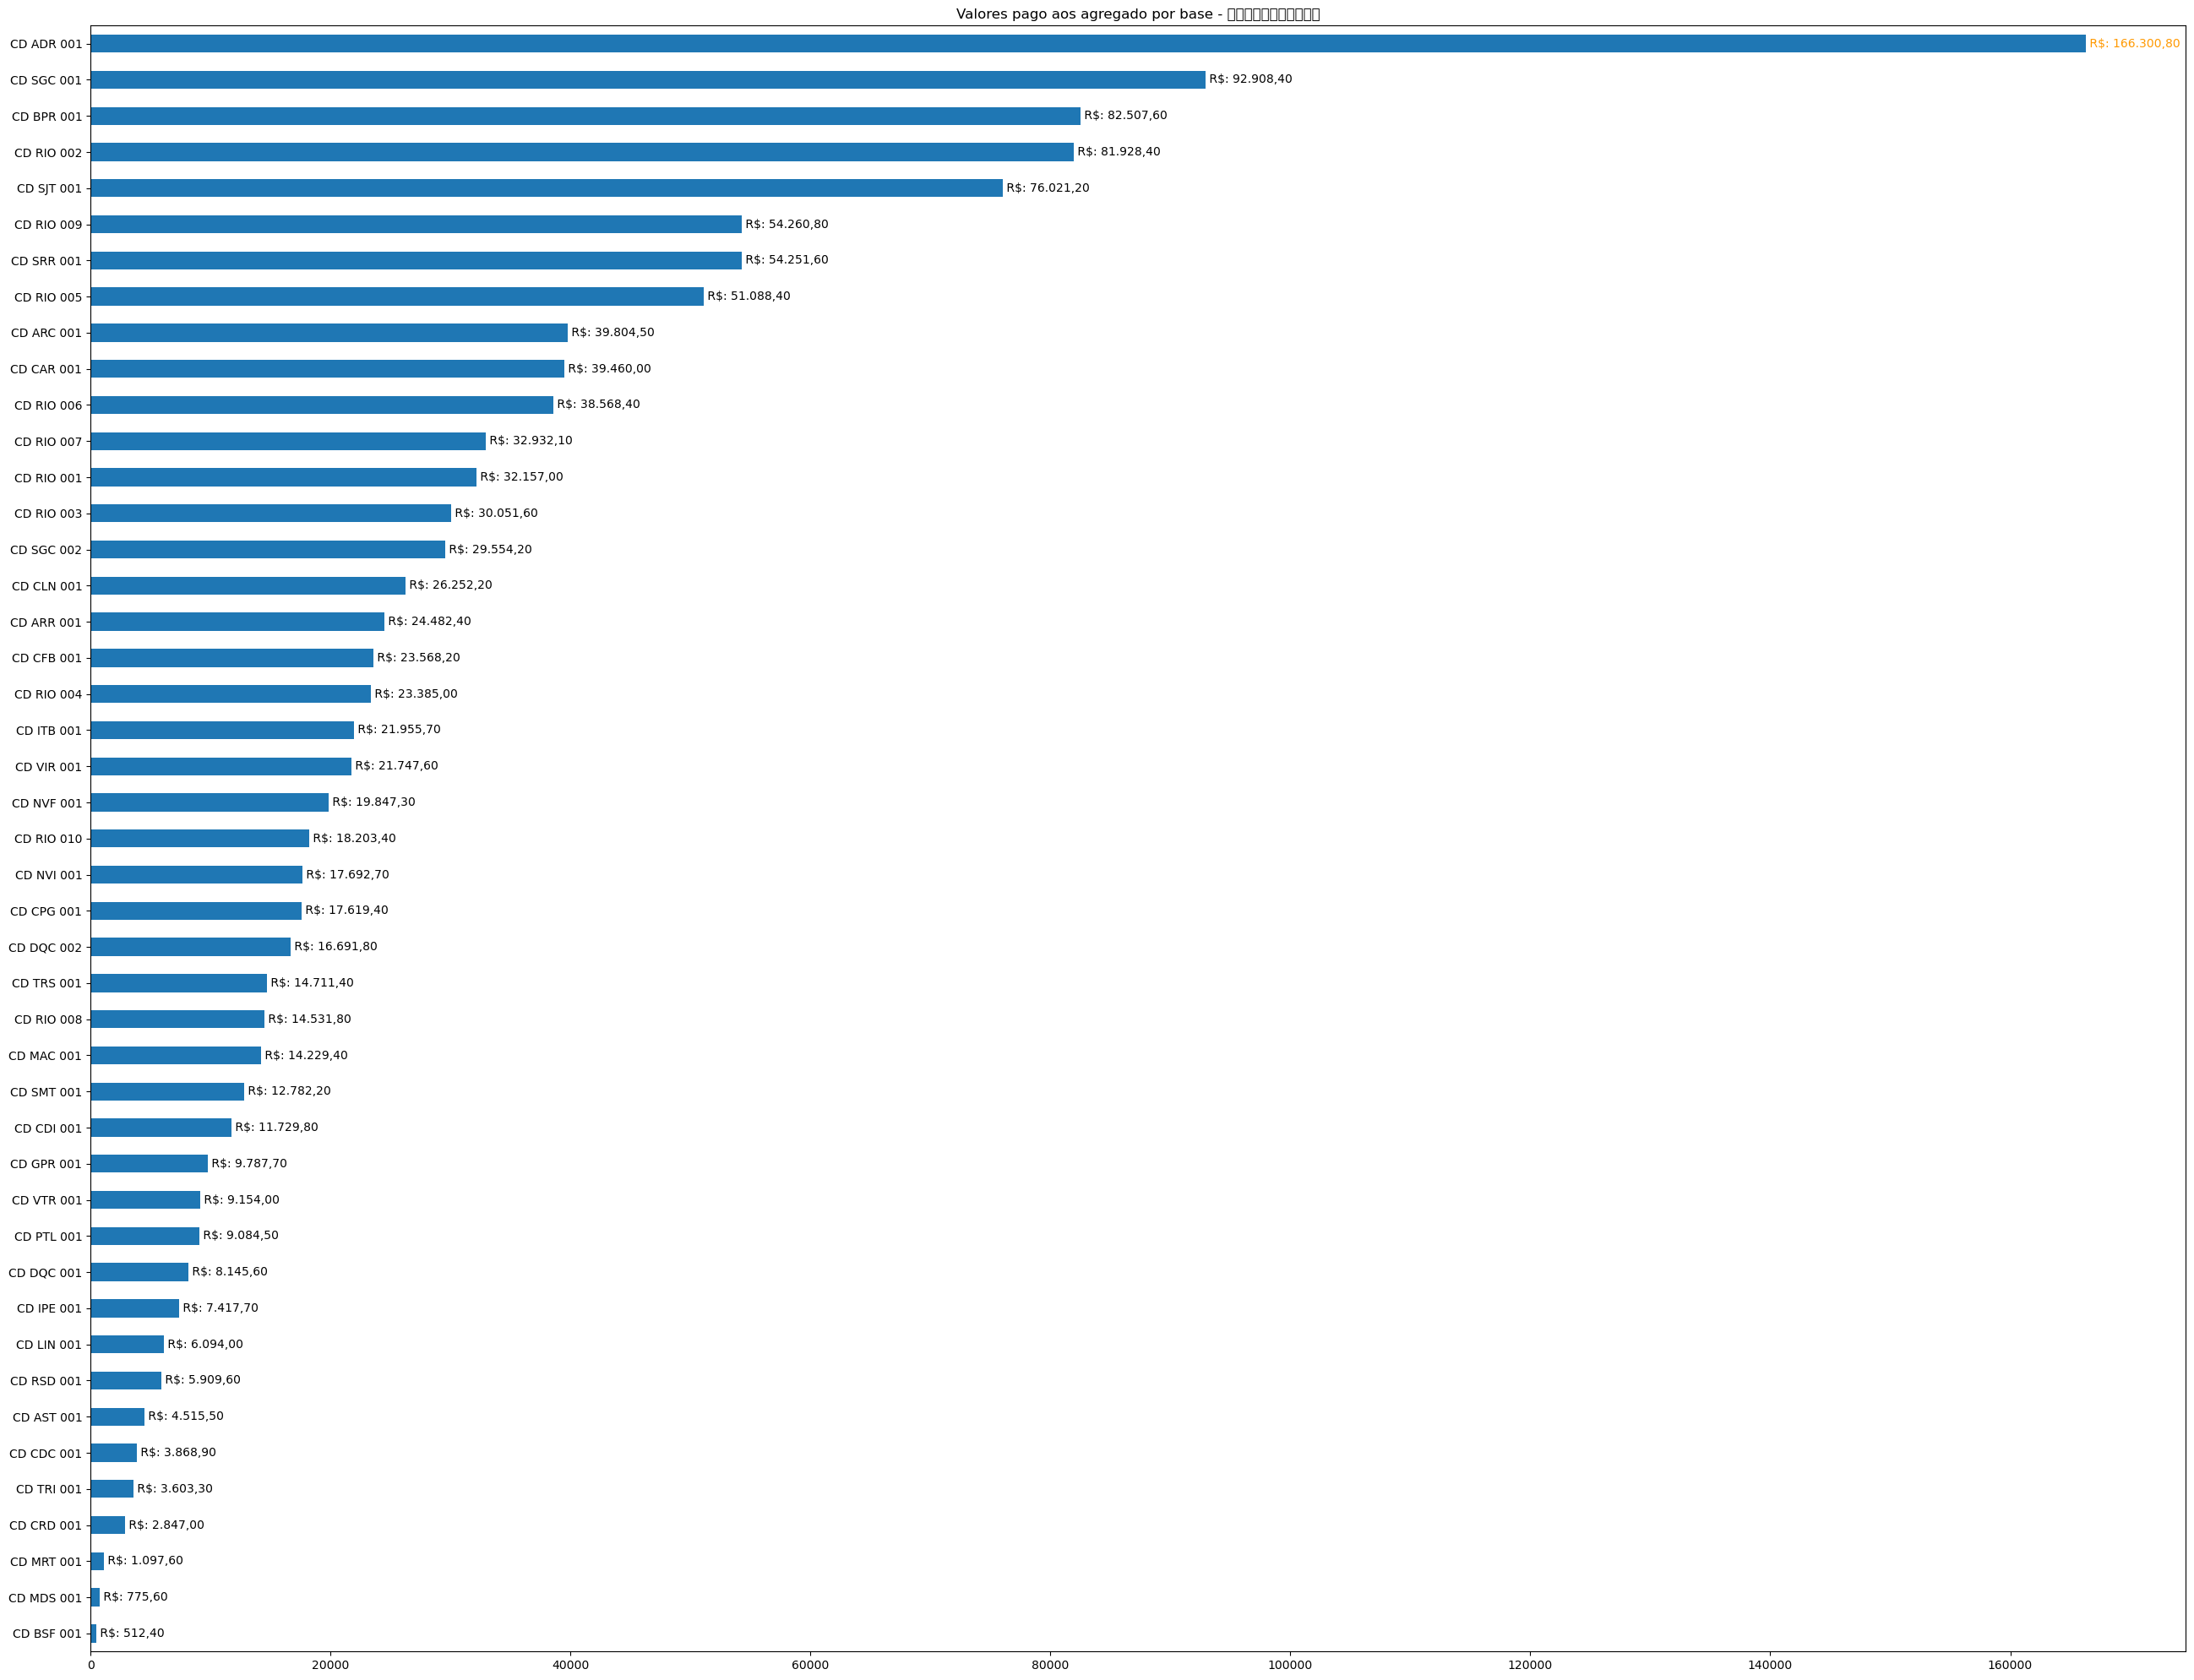

In [167]:
#Gerando graficos dos valores pago ao agregados somando por base

fig, ax = plt.subplots(figsize=(32,25))

#plota o gráfico de barras
df_valor_base.plot(kind='barh', legend=False)

plt.title('Valores pago aos agregado por base - 各中心支付给会员的金额')
plt.xlabel("")
plt.ylabel('')

#Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0], fmt=lambda x: f'{locale.format_string(" R$: %.2f", x, grouping=True)}')
b1[-1].set_color("#ff9900")

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout

In [55]:
#Separa por franqueado e especificar o valor gasto em Reais
df_franqueado_valor = df_dados.groupby('FRANQUEADO')['VALOR'].sum()

#Organizando de forma decrescente
df_franqueado_valor.sort_values(ascending=True, inplace=True)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

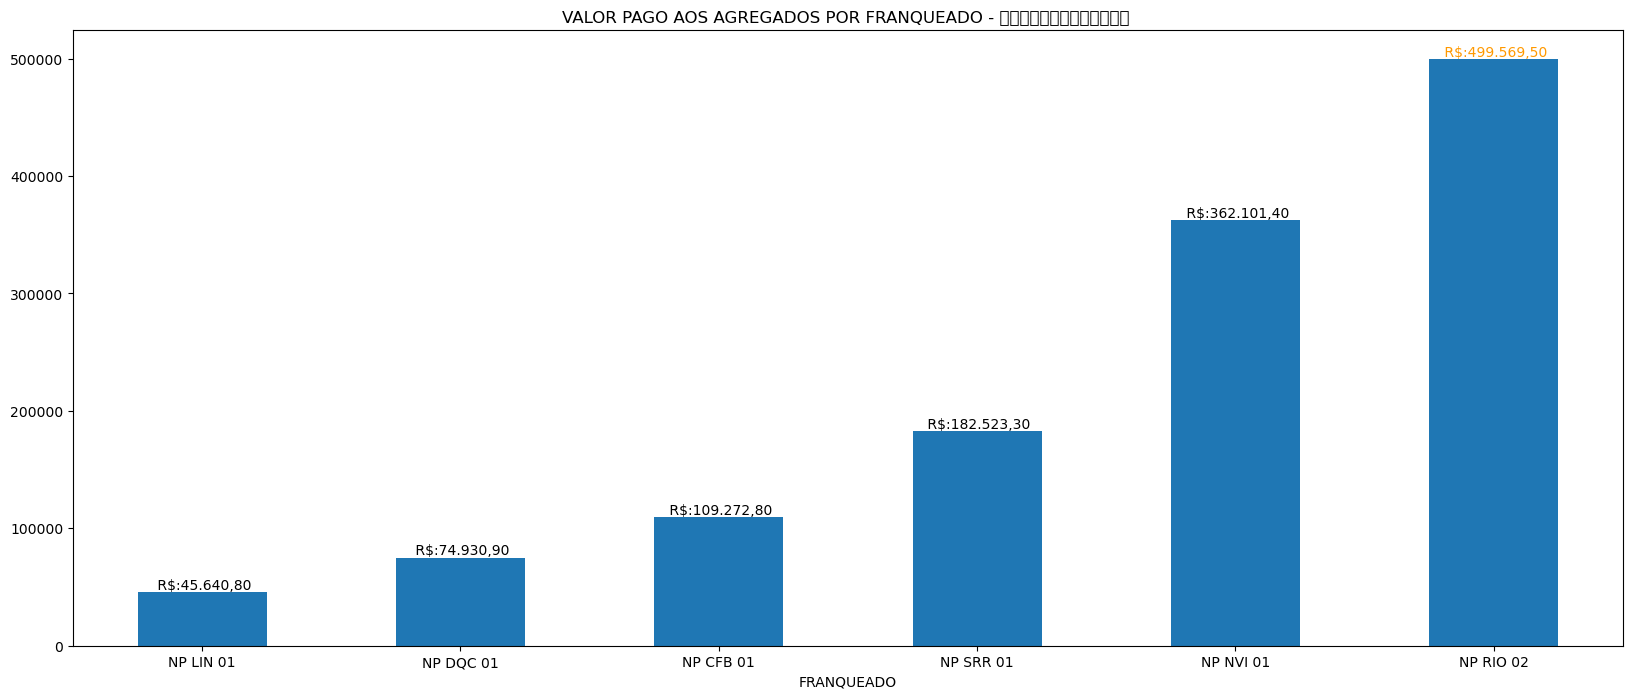

In [151]:
#Plotando  grafico com os valores pago por franqueado 
fig, ax = plt.subplots(figsize=(20,8))

#plota o gráfico de barras
df_franqueado_valor.plot(kind='bar', legend=False)

plt.title('VALOR PAGO AOS AGREGADOS POR FRANQUEADO - 加盟商向关联公司支付的金额 ')
#plt.xlabel("Nome dos hub's - 基本名称")
#plt.ylabel('1FRANQUEADO - 包装数量')

#Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0], fmt=lambda x: f'{locale.format_string(" R$:%.2f", x, grouping=True)}')
b1[-1].set_color("#ff9900")

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout

In [57]:
#Somando os valores por tipo de veiculo de entrega
df_tipodeveiculo = df_dados.groupby('TIPO_VEICULO')['VALOR'].sum()

#Exibi o dataframe

df_tipodeveiculo

TIPO_VEICULO
BIKE       27732.4
CARRO    1160747.9
MOTO       85558.4
Name: VALOR, dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

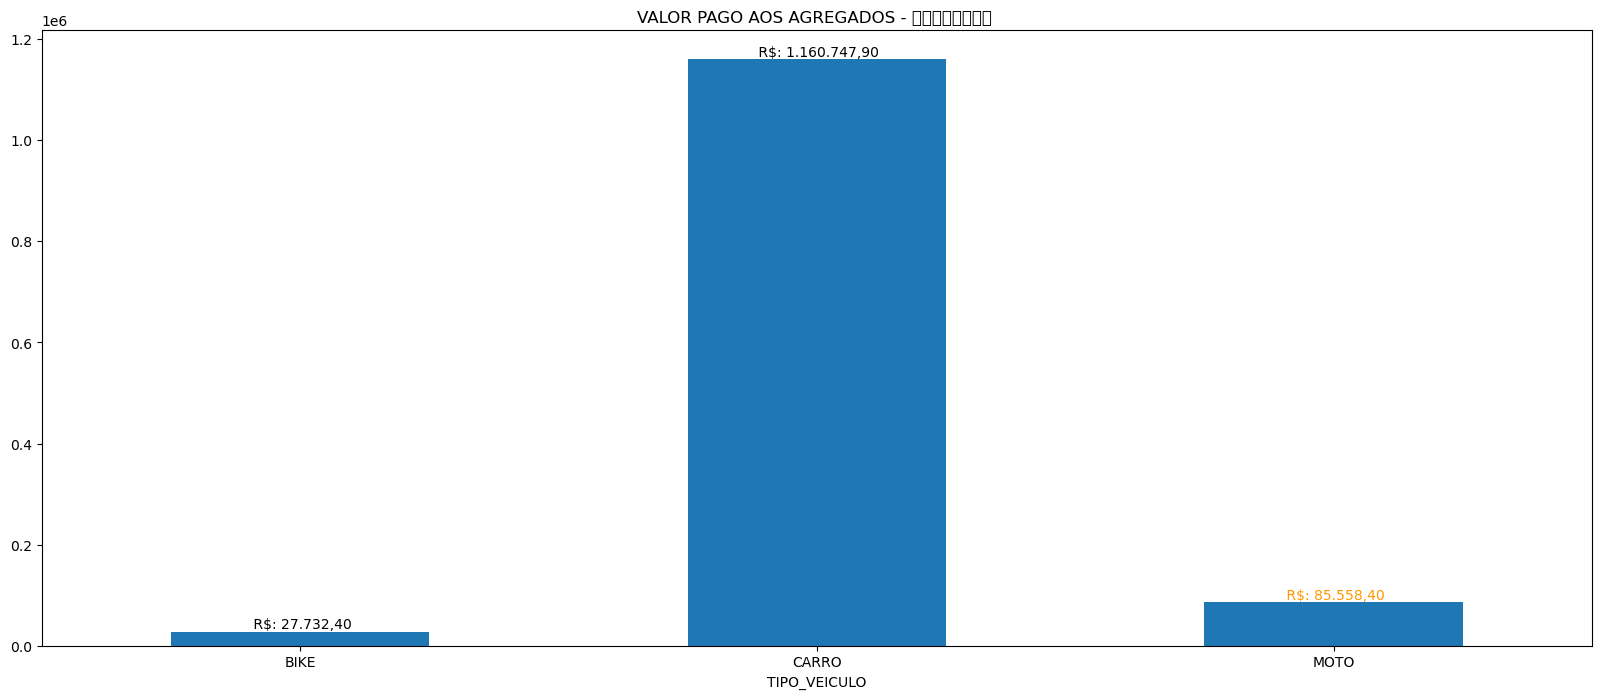

In [168]:
# OBS: PRECISO CORRIGIR O VALOR REFERENTE AO CARRO ( O ERRO ESTÁ NO GRAFICO)


#Plotando  grafico 
fig, ax = plt.subplots(figsize=(20,8))

#plota o gráfico de barras
df_tipodeveiculo.plot(kind='bar', legend=False)

plt.title('VALOR PAGO AOS AGREGADOS POR TIPO DE VEÍCULO - 按车辆类型支付给会员的金额')
#plt.xlabel("Nome dos hub's - 基本名称")
#plt.ylabel('1FRANQUEADO - 包装数量')

#Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0], fmt=lambda x: f'{locale.format_string(" R$: %.2f", x, grouping=True)}')

b1[-1].set_color("#ff9900")

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout

In [60]:
#Cidade que mais houve entregas

df_cidade_valor = df_dados.groupby('CIDADE')['VALOR'].sum()

#Exibindo a quantidade de cidade

df_cidade_valor.nunique()

166

In [63]:
# Instanciar as Top 10 cidades que mais pagaram os agregados

df_cidade_top10 = df_cidade_valor.sort_values(ascending=False).head(10)

#Exibindo o dataframe

df_cidade_top10

CIDADE
RIO DE JANEIRO        385951.5
ANGRA DOS REIS        115213.0
MARICÁ                 62406.4
ARACRUZ                38917.2
BELFORD ROXO           31115.0
MANGARATIBA            30989.0
SÃO GONÇALO            30492.0
NITERÓI                29570.6
VILA VELHA             27750.8
SÃO JOÃO DE MERITI     22544.6
Name: VALOR, dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

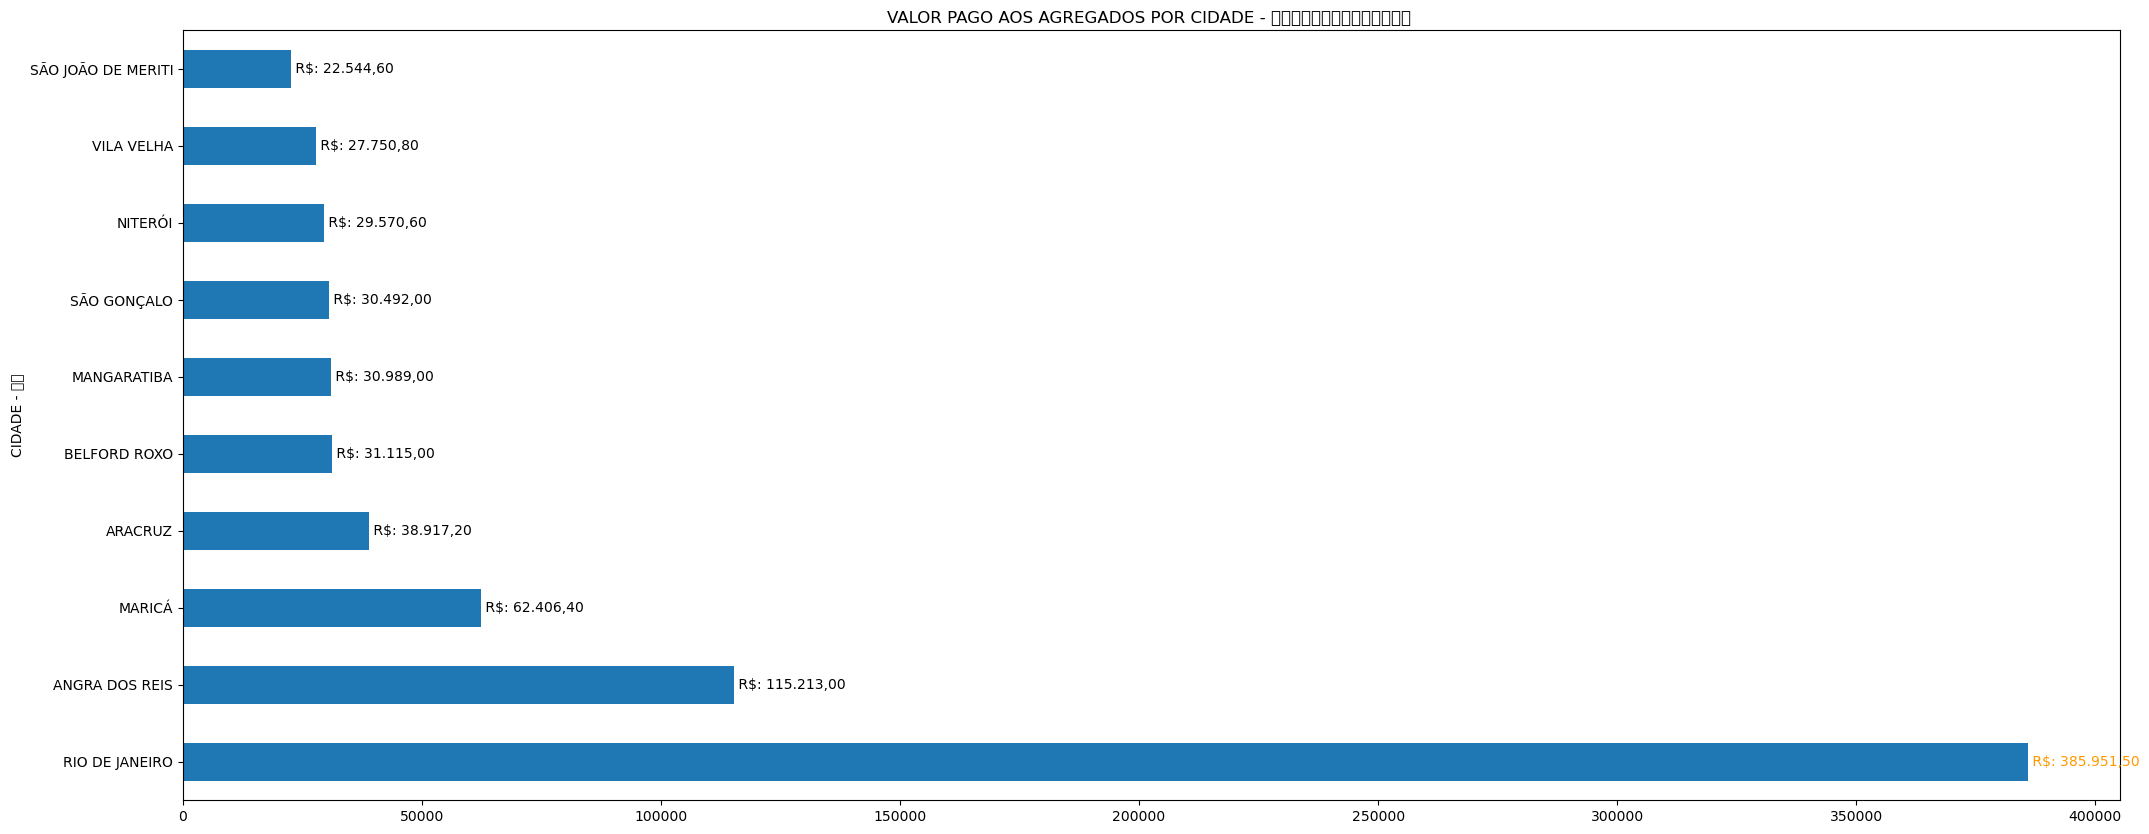

In [177]:
#Plotando  grafico 
fig, ax = plt.subplots(figsize=(25,10))

#plota o gráfico de barras
df_cidade_top10.plot(kind='barh', legend=False)

plt.title('VALOR PAGO AOS AGREGADOS POR CIDADE - 每个城市向附属公司支付的金额 ')
#plt.xlabel("Nome dos hub's - 基本名称")
plt.ylabel('CIDADE - 城市')

#Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0], fmt=lambda x: f'{locale.format_string(" R$: %.2f", x, grouping=True)}')

#Marca a posição especificada da barra
b1[0].set_color("#ff9900")

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout


In [88]:
#Valor por total de entraga por Bairro

df_dados['BAIRRO'].value_counts().head(10)

BAIRRO
BAIRRO INEXISTENTE              94192
CENTRO                          16032
RAMOS                            8164
BONSUCESSO                       6186
BARRA DA TIJUCA                  6024
CAMPO GRANDE                     5741
TAQUARA                          5450
PARQUE MAMBUCABA (MAMBUCABA)     4564
MARE                             4413
COPACABANA                       3926
Name: count, dtype: int64

In [180]:
#Valores agrupado 
df_bairro = df_dados.groupby('BAIRRO')['VALOR'].sum()

#Exibindo 

df_bairro_top10 = df_bairro.sort_values(ascending=False).head(10)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

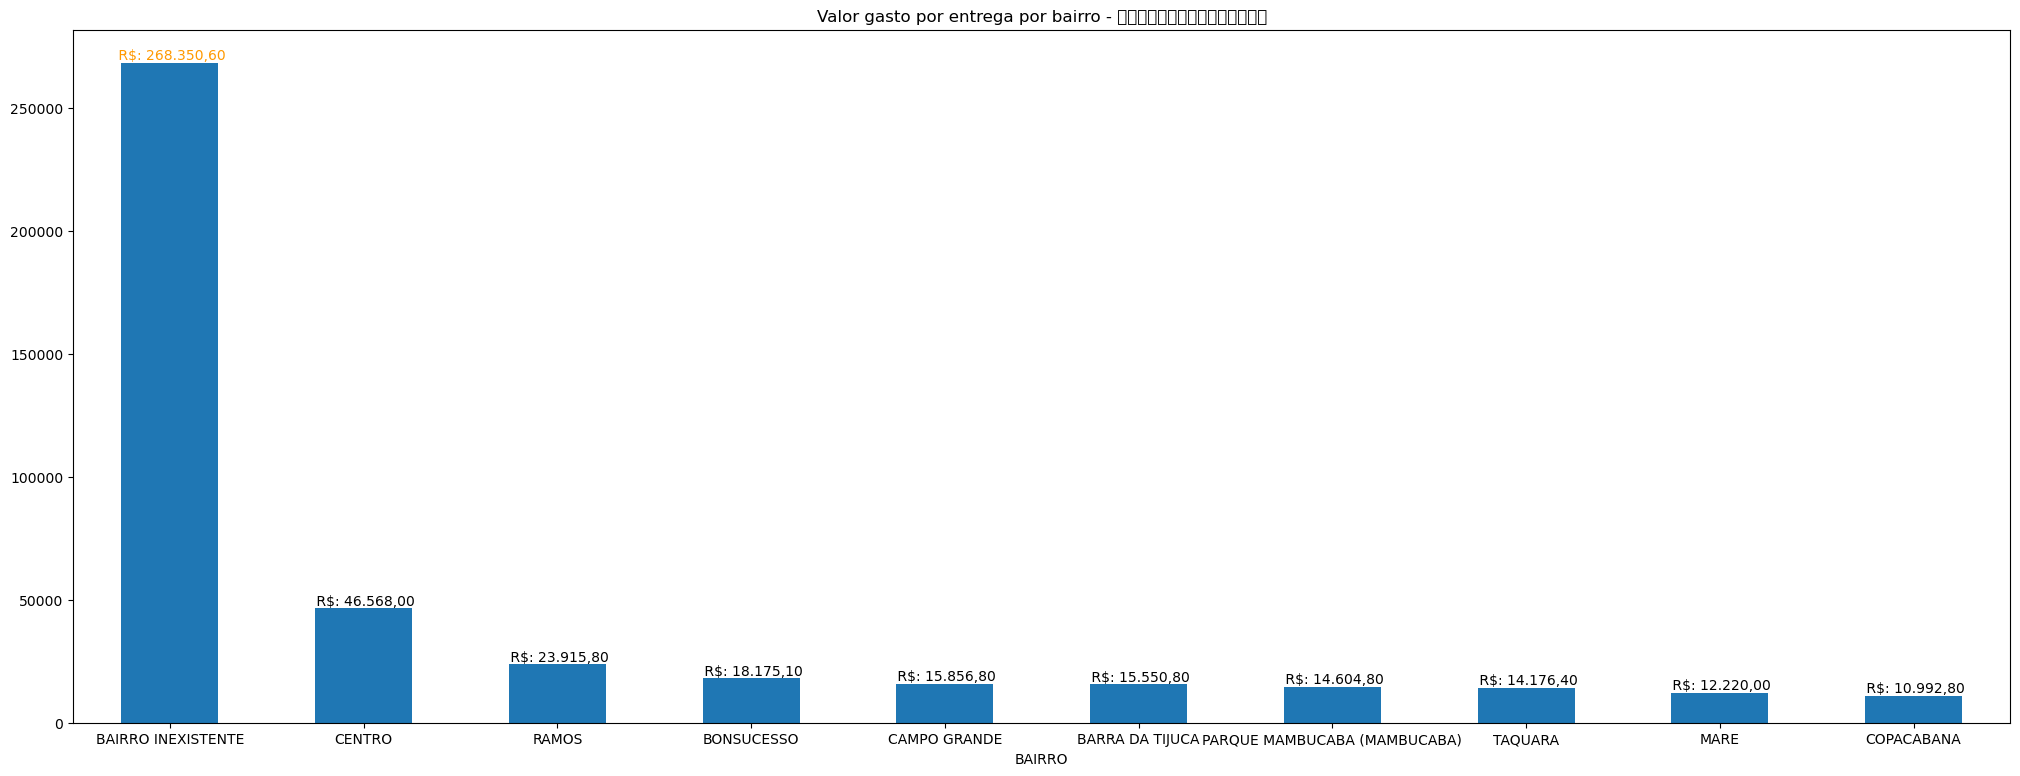

In [185]:
#Plotando  grafico 
fig, ax = plt.subplots(figsize=(25,9))

#plota o gráfico de barras
df_bairro_top10.plot(kind='bar', legend=False)

plt.title('Valor gasto por entrega por bairro - 按社区划分的每次送货花费的金额')
#plt.xlabel("Nome dos hub's - 基本名称")
#plt.ylabel('1FRANQUEADO - 包装数量')

#Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0], fmt=lambda x: f'{locale.format_string(" R$: %.2f", x, grouping=True)}')

#Marcando a barra especifica
b1[0].set_color("#ff9900")

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout


In [93]:
#Verifica quanto agregados possui nesse dataframe

df_dados['AGREGADO'].nunique()

2048

In [99]:
# instanciando os TOP 10 

# Instanciando os valroes por agregados.
df_agregados = df_dados.groupby('AGREGADO')['VALOR'].sum()

#Instanciando os top 10 que mais receberam
df_agregado_top = df_agregados.sort_values(ascending=False).head(10)

# Exbindo

df_agregado_top.head(10)

AGREGADO
MEI CARRO - GUSTAVO DE CASTRO SAGARIO              15507.6
ELAIZA LIMA GUIMARAES CARNEIRO                     12782.0
MEI CARRO - TIAGO VASCONCELOS DE SOUZA             10519.2
(CEF SERVISOS)CATIA ALVES DOS SANTOS                9206.4
ETC CEF SERVISOS CARRO - CATIA ALVES DOS SANTOS     8518.7
CARLOS EDUARDO DE CARVALHO DIAS                     8204.6
DIEGO CARDOSO DE OLIVEIRA                           7830.0
ETC NATAN RANGEL CARRO - NATAN RANGEL COSTA         7647.0
ETC DEDIC TRANSP CARRO - JORGE ANT PIANISSOLA       7443.0
MARCOS VINICIUS DA CONCEICAO                        7284.0
Name: VALOR, dtype: float64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

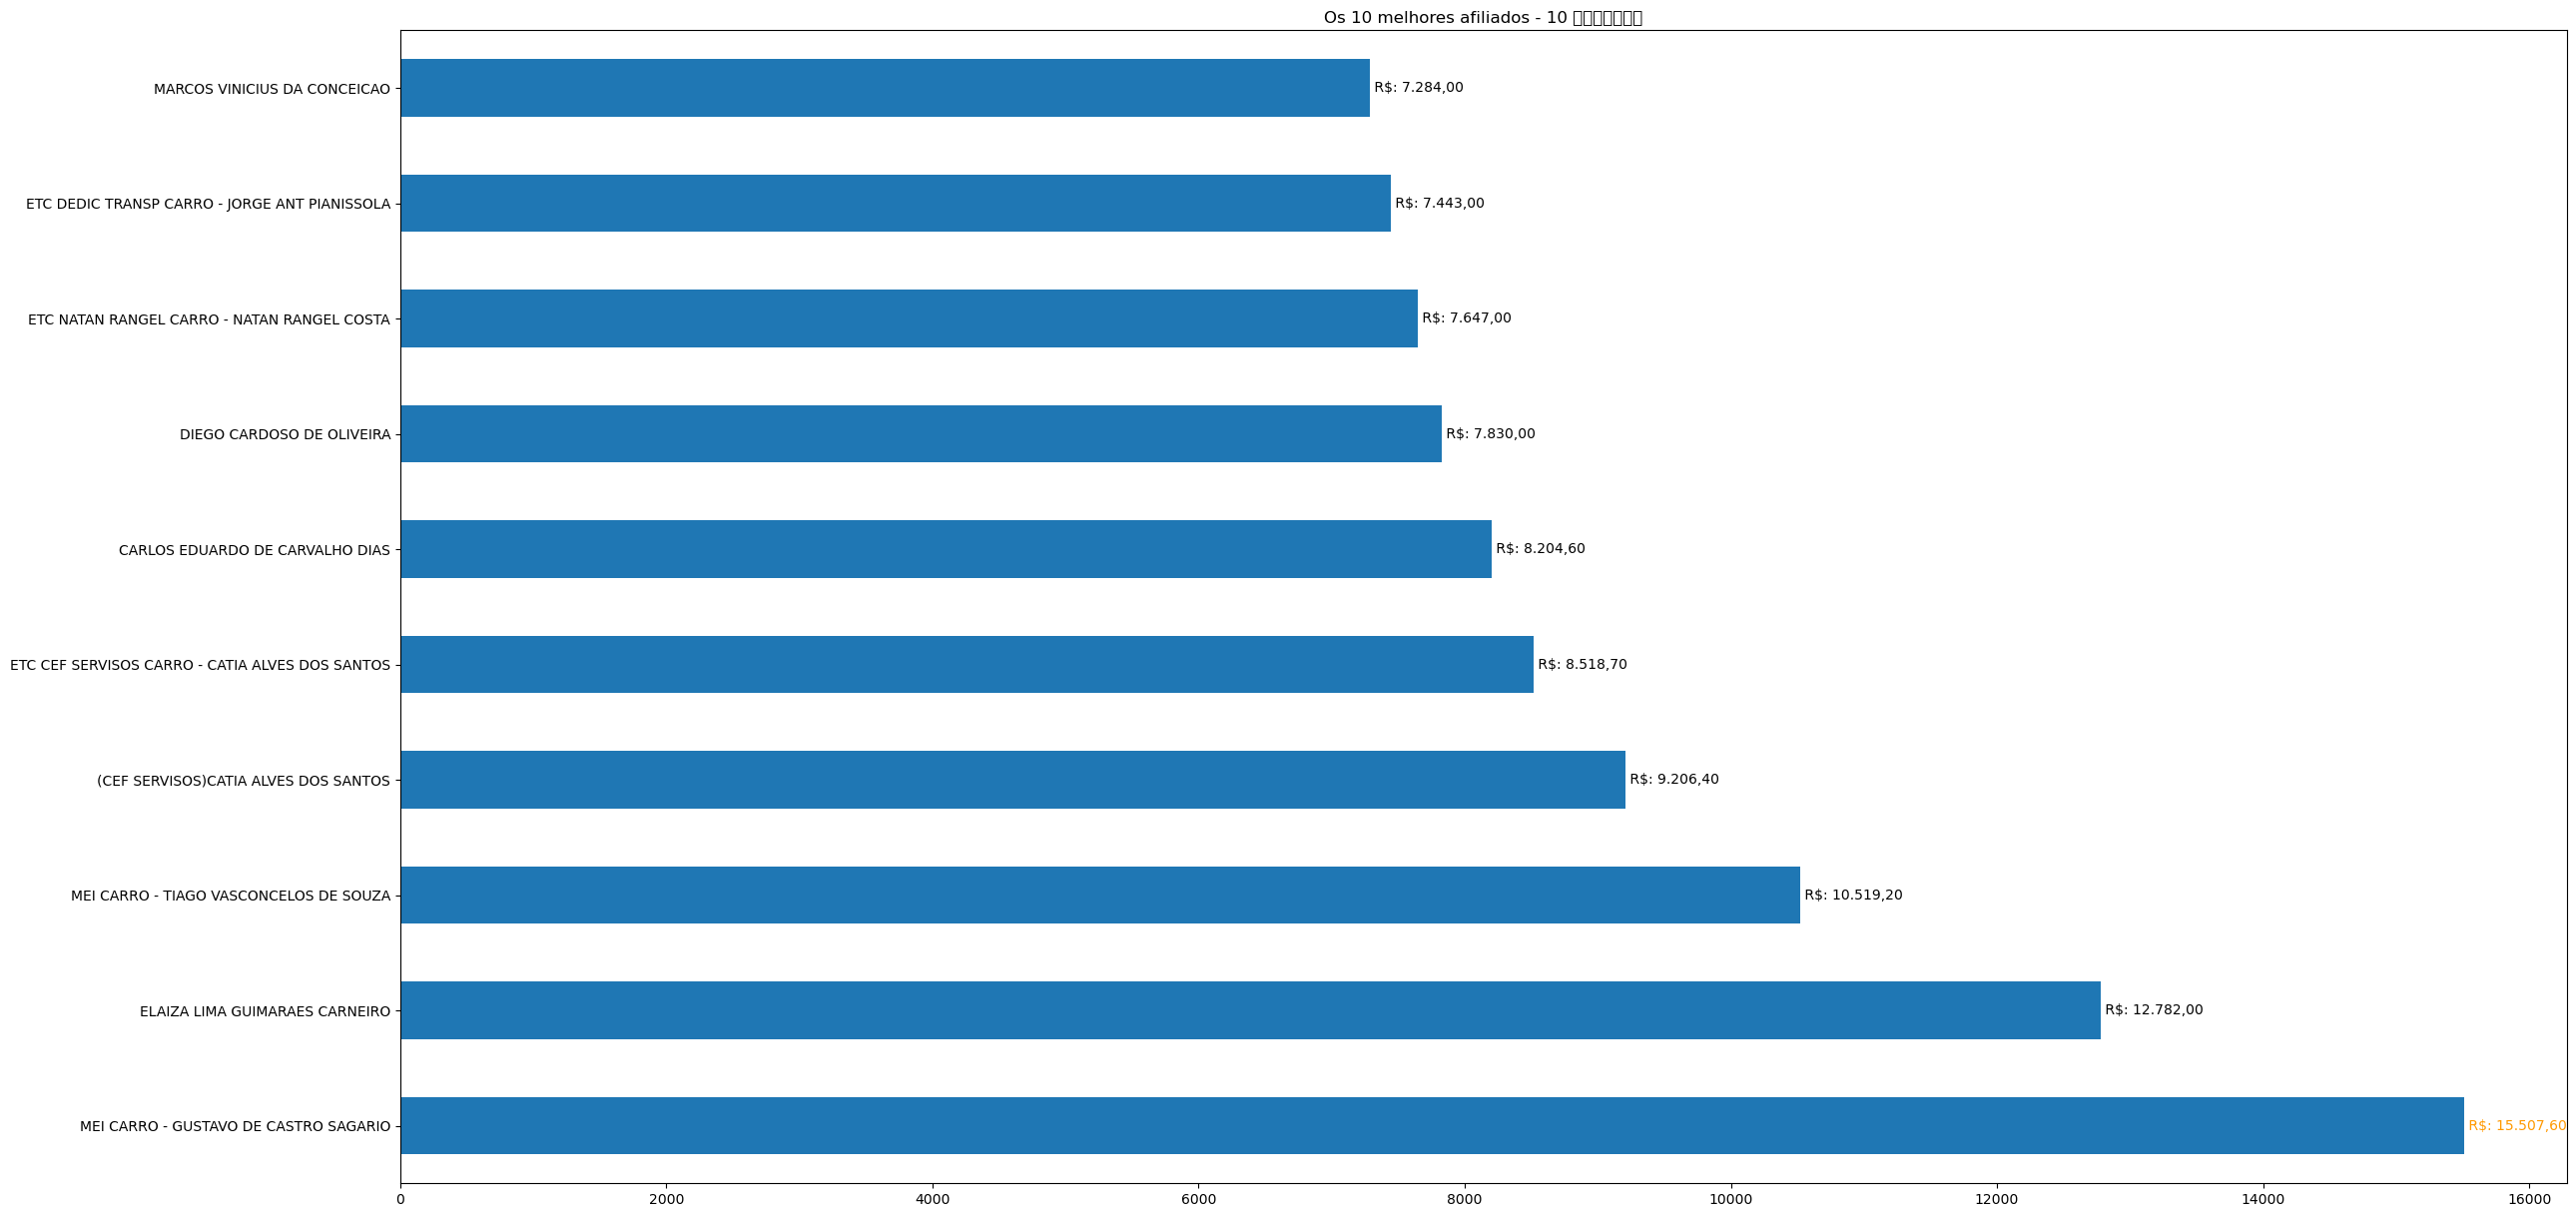

In [195]:
#Plotando  grafico 
fig, ax = plt.subplots(figsize=(28,15))

#plota o gráfico de barras
df_agregado_top.plot(kind='barh', legend=False)

plt.title('Os 10 melhores afiliados - 10 家最佳附属公司')
#plt.xlabel("Nome dos hub's - 基本名称")
plt.ylabel('')

#Acrescenta os valores sobre as barras
b1 = ax.bar_label(ax.containers[0], fmt=lambda x: f'{locale.format_string(" R$: %.2f", x, grouping=True)}')

b1[0].set_color("#ff9900")

# Função para deitar o nome do grafico
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

#Ajusta as margenes do gráfico ( para eliminar margnes desnecessárias)
plt.tight_layout
